In [2]:
import scanpy as sc
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
files = ['GSE182227/GSE182227_count.h5ad','GSE171899/GSE171899_count.h5ad','GSE211388/GSE211388_counts.h5ad']

In [4]:
import anndata as ad
flag=0
for file in files:
    adata2 = sc.read_h5ad(file)
    print('--------------------------',file,'-----------------------')
    print(adata2)
    print('######################################################')
    if flag == 0:
        cadata = adata2
        print(cadata)
        flag = 1
    else:
        cadata = [cadata, adata2]
        cadata = ad.concat(cadata, merge='same')
        print(cadata)

-------------------------- GSE182227/GSE182227_count.h5ad -----------------------
AnnData object with n_obs × n_vars = 70970 × 33701
    obs: 'Sample', 'Patient', 'Tissue_type', 'Selection', 'Sex', 'Age', 'DataID', 'Cancertype', 'Treatment', 'Smoking', 'Alcohol', 'Specimen', 'Stage'
######################################################
AnnData object with n_obs × n_vars = 70970 × 33701
    obs: 'Sample', 'Patient', 'Tissue_type', 'Selection', 'Sex', 'Age', 'DataID', 'Cancertype', 'Treatment', 'Smoking', 'Alcohol', 'Specimen', 'Stage'
-------------------------- GSE171899/GSE171899_count.h5ad -----------------------
AnnData object with n_obs × n_vars = 32661 × 33538
    obs: 'Sample', 'Tissue_type', 'Selection', 'Sex', 'DataID', 'Cancertype', 'Patient'
    var: 'gene_ids', 'feature_types'
######################################################
AnnData object with n_obs × n_vars = 103631 × 22164
    obs: 'Sample', 'Patient', 'Tissue_type', 'Selection', 'Sex', 'DataID', 'Cancertype'
------

# QC

In [7]:
cadata.layers['Count'] = cadata.X.copy()

In [8]:
#Quality control
cadata.var['mt'] = cadata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(cadata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/

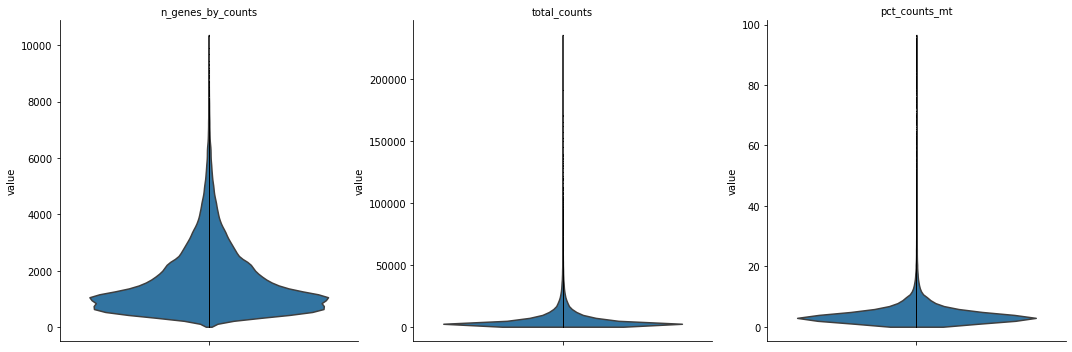

In [10]:
sc.pl.violin(cadata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0, multi_panel=True)

In [11]:
cadata = cadata[cadata.obs['pct_counts_mt']<20,:].copy()
cadata

AnnData object with n_obs × n_vars = 144708 × 22161
    obs: 'Sample', 'Patient', 'Tissue_type', 'Selection', 'Sex', 'DataID', 'Cancertype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'Count'

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


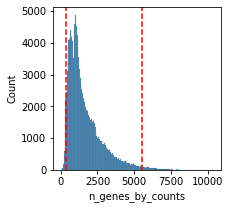

In [16]:
fig, ax = plt.subplots(figsize=(3, 3))
p3 = sns.histplot(cadata.obs['n_genes_by_counts'], kde=False)
plt.axvline(x=400,linestyle='--',color='red')
plt.axvline(x=5500,linestyle='--',color='red')

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


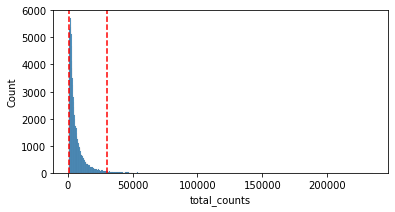

In [17]:
fig, ax = plt.subplots(figsize=(6, 3))
p3 = sns.histplot(cadata.obs['total_counts'], kde=False)
plt.axvline(x=500,linestyle='--',color='red')
plt.axvline(x=30000,linestyle='--',color='red')

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


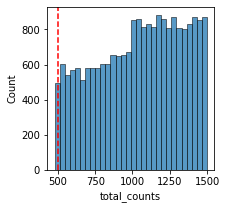

In [19]:
fig, ax = plt.subplots(figsize=(3, 3))
p3 = sns.histplot(cadata.obs['total_counts'][cadata.obs['total_counts']<1500], kde=False)
plt.axvline(x=500,linestyle='--',color='red')

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


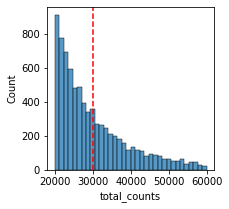

In [20]:
fig, ax = plt.subplots(figsize=(3, 3))
p3 = sns.histplot(cadata.obs['total_counts'][(cadata.obs['total_counts']>20000)&(cadata.obs['total_counts']<60000)], kde=False)
plt.axvline(x=30000,linestyle='--',color='red')

In [21]:
adata2 = cadata[(cadata.obs.n_genes_by_counts > 400)&(cadata.obs.n_genes_by_counts < 5500), :].copy()
adata2 = adata2[(adata2.obs.total_counts > 500)&(adata2.obs.total_counts < 30000), :].copy()
adata2

AnnData object with n_obs × n_vars = 135498 × 22161
    obs: 'Sample', 'Patient', 'Tissue_type', 'Selection', 'Sex', 'DataID', 'Cancertype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'Count'

# Normalization

In [23]:
adata2.obs['DataSampleID'] = adata2.obs['DataID'].astype('str')+'_'+adata2.obs['Sample'].astype('str')
#Normalization
sc.pp.normalize_total(adata2, target_sum=1e4)
sc.pp.log1p(adata2)

In [24]:
adata2.write_h5ad('Sorted_cells_combined_normalization.h5ad')

# LOY_prediction

In [27]:
import joblib
rf_classifier_loaded = joblib.load('/9YgenesonlyFinalnew_model.pkl')
rf_classifier_loaded

RandomForestClassifier(random_state=42)

In [26]:
Ychrgenes = ['DDX3Y', 'UTY', 'KDM5D', 'USP9Y', 'ZFY', 'RPS4Y1', 'TMSB4Y', 'EIF1AY', 'NLGN4Y']
set(Ychrgenes).difference(adata2.var_names)

set()

In [29]:
#Obtain expression matrix
X_tumor = adata2[:, Ychrgenes].X.todense()
X_tumor = pd.DataFrame(X_tumor, columns=Ychrgenes, index=adata2.obs.index)

In [34]:
#Get results
tumor_predictions = rf_classifier_loaded.predict(X_tumor)
adata2.obs["RL_Prediction_Only9genes"]=tumor_predictions.copy()
adata2.obs["RL_Prediction_Only9genes"].value_counts()
adata2.obs['LOY'] = adata2.obs["RL_Prediction_Only9genes"].map({0: 'WTY_SCR', 1: 'LOY_SCR'})
#Save
adata2.write_h5ad('Sorted_cells_combined_normalization.h5ad')

# LOY% plotting

In [89]:
def get_LOY_fraction_plot(adata,ctlevel,title,n,m): 
    from scipy.stats import chi2_contingency

    #get count table
    data = pd.DataFrame(index = adata.obs[ctlevel].unique(), 
                        columns = ['LOY_SCR','WTY_SCR'])
    for loy in data.columns:
        data[loy]=pd.DataFrame(adata.obs.loc[adata.obs['LOY']==loy,ctlevel].value_counts()).iloc[:,0]     
    print(data) 
    #get fraction table
    row_sum = data.sum(axis=1)
    data2 = data.div(row_sum,axis='rows')
    data2 = data2*100
    #sort 
    data2.sort_values('LOY_SCR',inplace=True)
    #plot
    fig, ax = plt.subplots(figsize=(n,m))
    data2.plot(kind='bar', stacked=True, color=['#c11c1d','#195697'],edgecolor='White',linewidth=1,ax=ax,width=0.9)
    labels = ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
    labels = ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
    plt.legend(loc = (1,0.5), fontsize = 7, frameon=False)
    plt.title(title,fontweight='bold')
    
    return data2
    

## Samples with CD45+ cells

In [ ]:
#ExtendedData Fig9d
for dataid in adata2.obs['DataID'].unique():
    sub_adata = adata2[(adata2.obs['DataID']==dataid)&(adata2.obs['Sex']=='male')&(adata2.obs['Tissue_type']=='tumor'),:].copy()
    data2 = get_LOY_fraction_plot(sub_adata[sub_adata.obs['Selection']=='CD45+ cells',:],
                          ctlevel='Sample',title=dataid+' '+sel,n=5,m=3,file=dataid+'_CD45+ cells.pdf')

## Matched samples

In [35]:
matched_samples = ['OP14','OP14CD45P','OP4','OP4CD45P', 'OP9','OP9GEX',
                   'humanN_170','humanP_170','humanN_171','humanP_171','humanN_2a','humanP_2b']

            LOY_SCR  WTY_SCR
OP14            148     1063
OP14CD45P        84     1550
OP4              65     2062
OP4CD45P         73     2046
OP9             269     3679
OP9GEX          142     1893
humanP_170     1413     2133
humanP_171     1149     2707
humanP_2b       462     3358
humanN_170     1476     2255
humanN_171      640     1056
humanN_2a        42      189


/tmp/ipykernel_276599/2842369586.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)


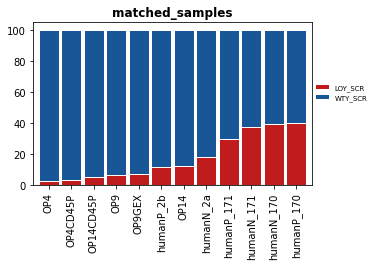

In [37]:
data2 = get_LOY_fraction_plot(adata2[(adata2.obs['Sample'].isin(matched_samples))&(adata2.obs['Sex']=='male'),:],
                      ctlevel='Sample',title='matched_samples',n=5,m=3)

In [43]:
#Copy meta data
meta = adata2.obs[['Sample', 'Patient','Tissue_type', 'Selection', 'Sex', 'DataID', 'Cancertype']].drop_duplicates()
data2['Patient'] = data2.index.map(dict(zip(meta['Sample'],meta['Patient'])))
data2['Selection'] = data2.index.map(dict(zip(meta['Sample'],meta['Selection'])))
#Reshape data
data = data2.pivot_table(index=['Patient'], columns='Selection', values='LOY_SCR', fill_value=0)
data['Patient'] = data.index.copy()

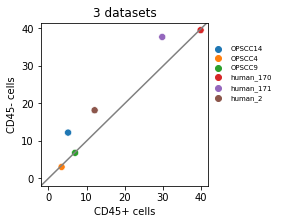

In [47]:
#ExtendedData Fig9e
fig, ax = plt.subplots(figsize=(3, 3))
p = sns.scatterplot(
                x='CD45+ cells',
                y="CD45- cells",
                s=50,
                hue='Patient',
                #cmap='RdYlBu_r',
                data=data,
    )
ax.axline((0, 0), slope=1,color='gray')
ax.set_title('3 datasets')
plt.legend(loc = (1,0.5), fontsize = 7, frameon=False)
plt.savefig('Sorted_cells_3datasets_CD45+-_scatter.pdf', dpi=300, bbox_inches='tight')